In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255

In [6]:
model = svm.SVC(kernel='linear')

In [7]:
model.fit(train_images, train_labels)

SVC(kernel='linear')

In [10]:
predictions = model.predict(test_images)

In [11]:
accuracy = accuracy_score(test_labels, predictions)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 94.04%


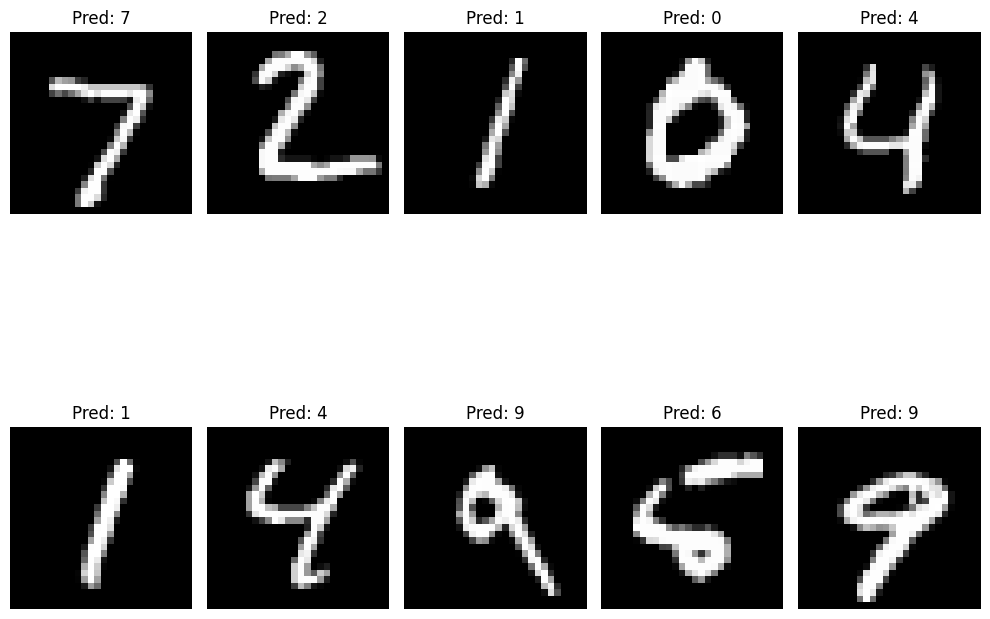

In [12]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predictions[i]}")
plt.tight_layout()
plt.show()

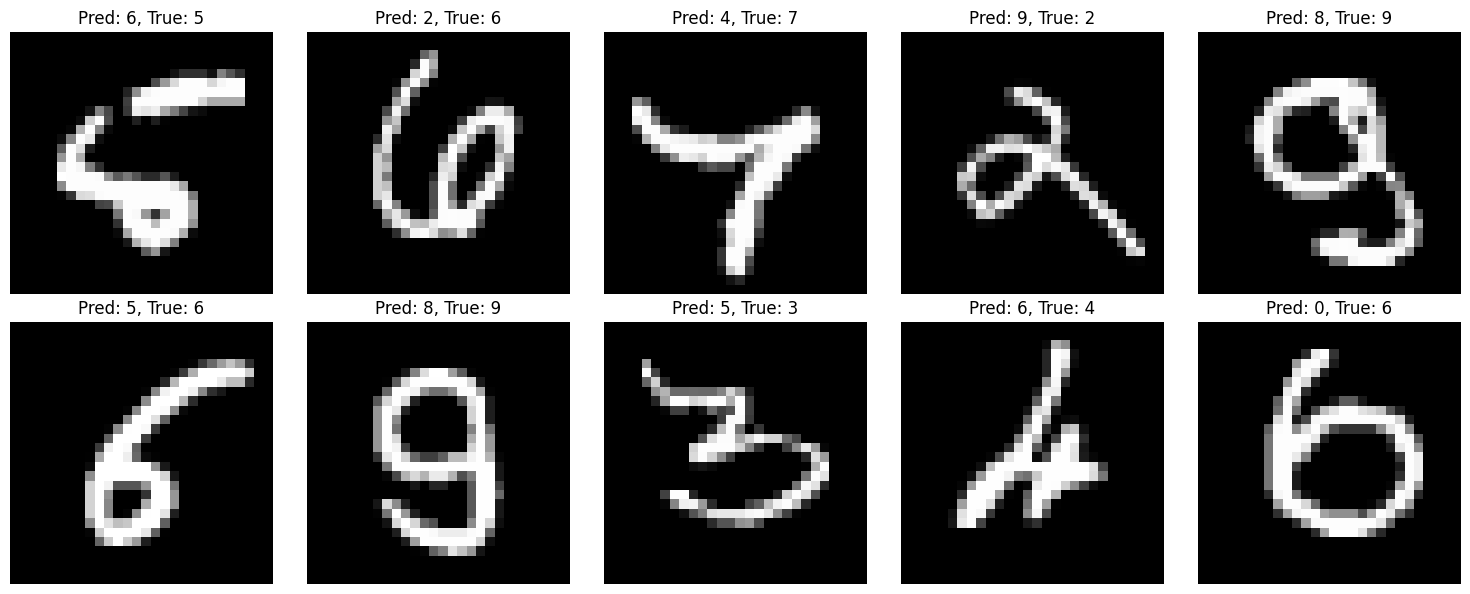

In [13]:
wrong_predictions = []
for i in range(len(test_images)):
    if predictions[i] != test_labels[i]:
        wrong_predictions.append((test_images[i], predictions[i], test_labels[i]))

# Menampilkan 10 gambar yang salah diprediksi
plt.figure(figsize=(15, 6))
for i in range(min(10, len(wrong_predictions))):
    plt.subplot(2, 5, i + 1)
    plt.imshow(wrong_predictions[i][0].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {wrong_predictions[i][1]}, True: {wrong_predictions[i][2]}", fontsize=12)

plt.tight_layout()
plt.show()